In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import os
sys.path.insert(0, os.path.abspath('../..'))

from UKMovementSensing import hsmm

import pandas as pd
import numpy as np

In [3]:
execfile('config.py')

## Load the data

In [4]:
filenames = os.listdir(subset_path)
filenames = [fn for fn in filenames if os.path.isfile(os.path.join(subset_path,fn))]
datasets = [pd.read_csv(os.path.join(subset_path,fn)) for fn in filenames]
print(len(datasets))

103


In [5]:
for i in range(len(datasets)):
    datasets[i] = datasets[i].set_index('timestamp')
    datasets[i].index = pd.to_datetime(datasets[i].index) 

In [6]:
# Take one example datset and have a look
example_index = 2
example_data = datasets[example_index]

example_data.head()

,acceleration,anglex,angley,anglez,invalid,filename,Slot,act,act_label,start_time,subset,switched_pos
timestamp,,,,,,,,,,,,
2015-03-17 12:00:00,0.027074,-40.930668,-23.299562,-40.067344,0,__021351_2015-04-10 15-50-10.bin_day1,49,4.0,In class,2015-03-17 12:00:00+00:00,1,False
2015-03-17 12:00:05,0.025782,-40.924448,-23.298756,-40.074190,0,__021351_2015-04-10 15-50-10.bin_day1,49,4.0,In class,2015-03-17 12:00:00+00:00,1,False
2015-03-17 12:00:10,0.026271,-40.977964,-23.315804,-40.007802,0,__021351_2015-04-10 15-50-10.bin_day1,49,4.0,In class,2015-03-17 12:00:00+00:00,1,False
2015-03-17 12:00:15,0.025538,-40.973473,-23.314307,-40.013422,0,__021351_2015-04-10 15-50-10.bin_day1,49,4.0,In class,2015-03-17 12:00:00+00:00,1,False
2015-03-17 12:00:20,0.026293,-40.980682,-23.320076,-40.001909,0,__021351_2015-04-10 15-50-10.bin_day1,49,4.0,In class,2015-03-17 12:00:00+00:00,1,False


## Prepare data for HSMM

In [7]:
X_list = [d[column_names].as_matrix() for d in datasets]

## Train HSMM

/home/dafne/anaconda2/envs/ucl2/lib/python2.7/site-packages/pybasicbayes/util/stats.py:185: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  x = np.random.randn(nu,n)


0
Resampled 103 sequences in 275.6 seconds
('Log likelihood: ', -21484599.289775837)
1
Resampled 103 sequences in 227.1 seconds
('Log likelihood: ', -20005863.513989009)


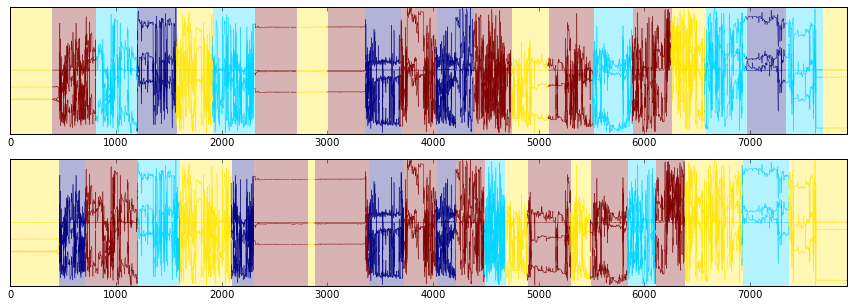

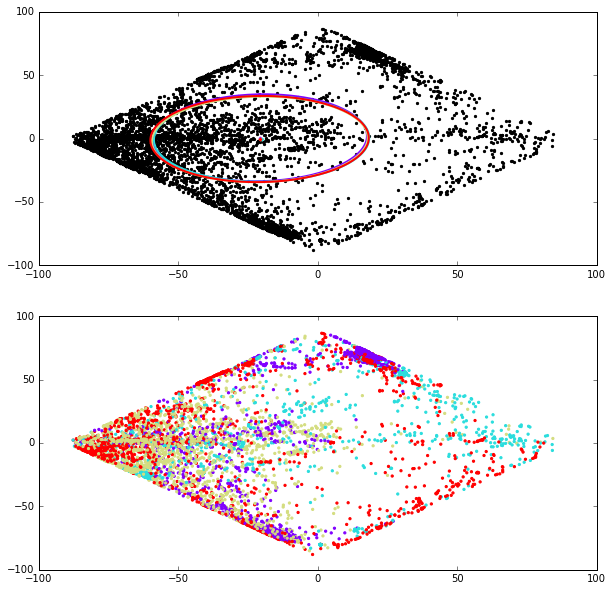

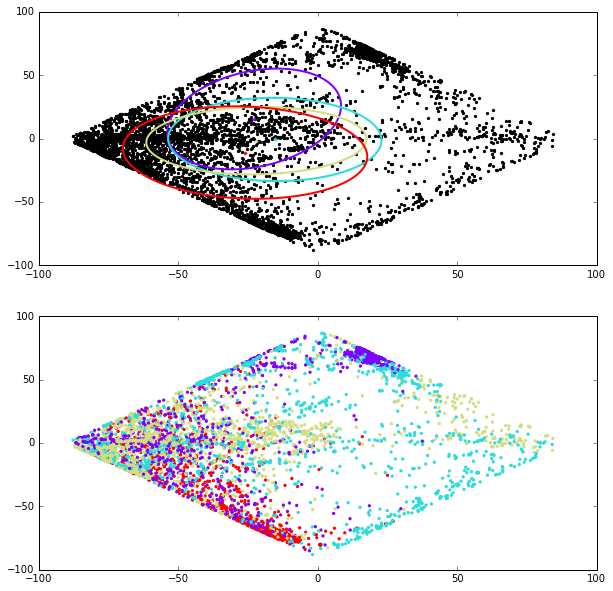

In [8]:
model, model_dist = hsmm.train_hsmm(X_list, Nmax=Nmax, nr_resamples=nr_resamples, trunc=truncate, visualize=True, example_index=example_index)

## Save the model

In [9]:
import pickle
#TODO: the model object also contains the data so this is not very efficient
if not os.path.exists(model_path):
        os.makedirs(model_path)
with open(os.path.join(model_path, 'model_{}states.pkl'.format(Nmax)), 'wb') as f:
    pickle.dump(model, file=f)

## Save the data with the states

In [10]:
if not os.path.exists(states_path):
        os.makedirs(states_path)
for i, dat in enumerate(datasets):
    dat['state'] = model.stateseqs[i]
    fn = str(str(dat['subset'][0]) + dat['filename'][0])+'.csv'
    dat.to_csv(os.path.join(states_path, fn))